# Team 1 - UFC Fighters


![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rajeevw/ufcdata)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link to be provided later)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

Ideas

A. Data Exloration

B. Data Analysis
- Target Audience : Viewers / Fighters who want to know more about the matches as well as winner.

- Target Question : Given any two fighters, how can we make the best predict for the winner of match?

- Approach : We will explore 5 Categorical Features & some Continuous Features to answer our Question.

- Categorical Data: 
 
  'Winner' : Red or Blue
 
  'Date' : Popularity by Year

  'Weight Class' 
  
  'Age' 
 
  'Location'

- Continuous Data: Explore top 5 most positively & negatively correlated technical stats to Win Rate. (Not yet)
   + We will select the top 5 most positively corelated technical statistics to 'Winner' (i.e. the higher these stats are, the more likely the Red or Blue winner wins the match) as well as the top 5 most negatively corelated technical stats which tells the opposite (i.e. the lower these stats are, the more likely the Red or Blue winner would win.
We will use the DataFrames red and blue created above.
We begin by replacing string values ('Red', 'Blue', 'Draw) in the Winner column with scores: -1 if figher loses, +1 if fighter wins, 0 if draw.
   + Then, we selected the top 5 stats that are highly correlated to the win rate (positively & negatively) and use them in the same criteria to increase the weight. We'd like to use this group of technical stats collectively to make predictions about any two fighters.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import Dataset
matches = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/01-ufc-fight/matches.csv')
fighters = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/01-ufc-fight/fighters.csv')

In [0]:
# matches 
print('There are' , (matches.shape[0]), 'rows in this dataframe.')
print('There are' , (matches.shape[1]), 'columns in this dataframe.')

matches.sample(1)

There are 5144 rows in this dataframe.
There are 145 columns in this dataframe.


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4312,Sam Stout,Per Eklund,Mario Yamasaki,2008-01-19,"Newcastle, England, United Kingdom",Red,False,Lightweight,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,18.0,12.333333,9.333333,6.333333,115.0,39.0,7.333333,3.333333,107.333333,31.0,0.0,6.333333,5.333333,2.333333,0.333333,131.666667,48.666667,0.443333,1.333333,4.333333,1.666667,0.313333,144.666667,61.666667,7.0,635.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Orthodox,175.26,177.8,155.0,NaN,23.0


In [0]:
# fighters 
print('There are' , (fighters.shape[0]), 'rows in this dataframe.')
print('There are' , (fighters.shape[1]), 'columns in this dataframe.')

fighters.sample(1)

There are 3313 rows in this dataframe.
There are 6 columns in this dataframe.


,fighter_name,Height,Weight,Reach,Stance,DOB
1499,Jesse Taylor,"6' 0""",170 lbs.,"73""",Orthodox,"Jan 02, 1983"


In [0]:
# print(type(matches.isnull().sum()))
# print(matches.isnull().sum().shape)

columnsnull = matches.isnull().sum()
lstcolumnnull = columnsnull[columnsnull.values != 0].index.tolist()

print ('There are', len(lstcolumnnull), 'columns with missing values.')
print ('The percentage of columns with missing values is', 
       columnsnull[columnsnull.values != 0].count() / matches.shape[1] * 100, 
        '%')



There are 109 columns with missing values.
The percentage of columns with missing values is 75.17241379310344 %


In [0]:
rowsnull = matches[matches.isnull().any(axis = 1)]

print ('There are', len(matches[matches.isnull().any(axis = 1) ]), 'rows with missing values.')
print ('The percentage of rows with missing values is', len(rowsnull) / matches.shape[0] * 100, '%')

There are 1942 rows with missing values.
The percentage of rows with missing values is 37.75272161741835 %


In [0]:
col = matches.columns
RedCol, BlueCol, PlayCol = [], [], []

for i in col:
    if 'R_' == i[:2]: RedCol.append(i)
    elif 'B_' in i[:2]: BlueCol.append(i)
    else : PlayCol.append(i)
    
print(f"Red Fighter Info : {len(RedCol)}\nBlue Fighter Info : {len(BlueCol)}\nPlay Info : {len(PlayCol)}")

Red Fighter Info : 69
Blue Fighter Info : 69
Play Info : 7


Due to the sheer amount of columns (145 in total and 109 containing null values), I decide to separate our dataset into two tables containing information for <font color = red> Red </font> & <font color = blue> Blue </font> separately + non-color-specific columns such as <font color = grey> 'Referee', 'date', location', 'Winner', 'title_bout', 'weight_class, and 'no_of_rounds'.</font>

In [0]:
red = matches.drop(['B_fighter','B_current_lose_streak','B_current_win_streak','B_draw','B_avg_BODY_att','B_avg_BODY_landed','B_avg_CLINCH_att',
                    'B_avg_CLINCH_landed','B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_GROUND_att','B_avg_GROUND_landed','B_avg_HEAD_att',
                    'B_avg_HEAD_landed','B_avg_KD','B_avg_LEG_att','B_avg_LEG_landed','B_avg_PASS','B_avg_REV','B_avg_SIG_STR_att','B_avg_SIG_STR_landed',
                    'B_avg_SIG_STR_pct','B_avg_SUB_ATT','B_avg_TD_att','B_avg_TD_landed','B_avg_TD_pct','B_avg_TOTAL_STR_att','B_avg_TOTAL_STR_landed',
                    'B_longest_win_streak','B_losses','B_avg_opp_BODY_att','B_avg_opp_BODY_landed','B_avg_opp_CLINCH_att','B_avg_opp_CLINCH_landed',
                    'B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed','B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed','B_avg_opp_HEAD_att',
                    'B_avg_opp_HEAD_landed','B_avg_opp_KD','B_avg_opp_LEG_att','B_avg_opp_LEG_landed','B_avg_opp_PASS','B_avg_opp_REV',
                    'B_avg_opp_SIG_STR_att','B_avg_opp_SIG_STR_landed','B_avg_opp_SIG_STR_pct','B_avg_opp_SUB_ATT','B_avg_opp_TD_att',
                    'B_avg_opp_TD_landed','B_avg_opp_TD_pct','B_avg_opp_TOTAL_STR_att','B_avg_opp_TOTAL_STR_landed','B_total_rounds_fought',
                    'B_total_time_fought(seconds)','B_total_title_bouts','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
                    'B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_wins','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','B_age'], axis = 1)
print(red.shape)
red.sample()

(5144, 76)


,R_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
363,Randa Markos,Camila Albuquerque,2018-09-22,"Sao Paulo, Sao Paulo, Brazil",Draw,False,Women's Strawweight,3,1.0,0.0,0.0,4.777778,3.333333,8.777778,6.222222,77.666667,25.444444,10.666667,8.222222,85.666667,31.0,0.0,6.666667,5.555556,2.222222,0.444444,97.111111,39.888889,0.402222,0.222222,5.666667,1.444444,0.333333,138.888889,77.111111,1.0,5.0,9.444444,6.111111,8.555556,6.666667,99.666667,31.111111,8.111111,6.111111,95.111111,28.222222,0.0,11.777778,9.555556,2.111111,0.333333,116.333333,43.888889,0.403333,0.333333,2.888889,1.333333,0.311111,146.0,69.0,25.0,830.444444,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,Orthodox,162.56,160.02,115.0,33.0


In [0]:
blue = matches.drop(['R_fighter','R_current_lose_streak','R_current_win_streak','R_draw','R_avg_BODY_att','R_avg_BODY_landed','R_avg_CLINCH_att',
                     'R_avg_CLINCH_landed','R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_GROUND_att','R_avg_GROUND_landed','R_avg_HEAD_att',
                     'R_avg_HEAD_landed','R_avg_KD','R_avg_LEG_att','R_avg_LEG_landed','R_avg_PASS','R_avg_REV','R_avg_SIG_STR_att','R_avg_SIG_STR_landed',
                     'R_avg_SIG_STR_pct','R_avg_SUB_ATT','R_avg_TD_att','R_avg_TD_landed','R_avg_TD_pct','R_avg_TOTAL_STR_att','R_avg_TOTAL_STR_landed',
                     'R_longest_win_streak','R_losses','R_avg_opp_BODY_att','R_avg_opp_BODY_landed','R_avg_opp_CLINCH_att','R_avg_opp_CLINCH_landed',
                     'R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed','R_avg_opp_GROUND_att','R_avg_opp_GROUND_landed','R_avg_opp_HEAD_att',
                     'R_avg_opp_HEAD_landed','R_avg_opp_KD','R_avg_opp_LEG_att','R_avg_opp_LEG_landed','R_avg_opp_PASS','R_avg_opp_REV',
                     'R_avg_opp_SIG_STR_att','R_avg_opp_SIG_STR_landed','R_avg_opp_SIG_STR_pct','R_avg_opp_SUB_ATT','R_avg_opp_TD_att',
                     'R_avg_opp_TD_landed','R_avg_opp_TD_pct','R_avg_opp_TOTAL_STR_att','R_avg_opp_TOTAL_STR_landed','R_total_rounds_fought',
                     'R_total_time_fought(seconds)','R_total_title_bouts','R_win_by_Decision_Majority','R_win_by_Decision_Split',
                     'R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_wins','R_Stance',
                     'R_Height_cms','R_Reach_cms','R_Weight_lbs','R_age'], axis = 1)
print(blue.shape)
blue.sample()

(5144, 76)


,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age
136,Junior Dos Santos,Herb Dean,2019-03-09,"Wichita, Kansas, USA",Blue,False,Heavyweight,5,0.0,2.0,0.0,29.055556,19.555556,8.388889,4.888889,104.555556,48.722222,6.111111,3.888889,87.888889,36.166667,0.722222,2.111111,1.777778,0.277778,0.0,119.055556,57.5,0.513889,0.055556,0.5,0.277778,0.194444,126.166667,63.444444,9.0,4.0,6.055556,4.444444,12.388889,8.111111,73.333333,26.055556,4.833333,3.5,77.388889,27.277778,0.222222,7.111111,5.944444,0.222222,0.0,90.555556,37.666667,0.425,0.055556,4.555556,0.888889,0.103333,108.333333,52.833333,49.0,721.388889,5.0,0.0,0.0,5.0,9.0,0.0,0.0,14.0,Orthodox,193.04,195.58,238.0,35.0


In [0]:
#Play Info Type

#Visualization by feature is as follows.
play_info = matches[PlayCol]

play_info.head()

,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds
0,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5
1,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5
2,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3
3,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3
4,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3


- Date:
Time Series Everything : Animation, Timely comparison
Number of matches

- Location:
Where do some fighters win a lot?
Monthly Matches Animation

- Winner & weight_class :
Most Winner by Weight Class

In [0]:
# Matches

# The days are very different. So this time, I do a visualization by year.

play_info['year'] = play_info['date'].apply(lambda x : x.split('-')[0])
play_counts = pd.DataFrame(play_info['year'].value_counts().sort_index())
play_counts['count'] = play_counts['year']
play_counts['year'] = play_counts.index


play_counts.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,count
1993,1993,8
1994,1994,29
1995,1995,33
1996,1996,36
1997,1997,39


In [0]:
#Visualization

import missingno as msno
import altair as alt

alt.Chart(play_counts).mark_area(
    color="lightblue",
    interpolate='step-after',
    line=True
).encode(
    x='year',
    y='count'
)

#alt.Chart : Make chart object
#mark_area : In this part, call the desired graph type method.
#Put the desired argument inside the method.
#encode : Just put the elements you need on each axis.

alt.Chart(...)

In [0]:
#Weight Class

#First, let's see how many games are played in each weight class.

#In this time, I use make_bar method.

weight_class_count = pd.DataFrame(matches['weight_class'].value_counts())
weight_class_count['class'] = weight_class_count.index

alt.Chart(weight_class_count).mark_bar(
    color="#564d8d"
).encode(
    y='class',
    x='weight_class'
)

alt.Chart(...)

In [0]:
# RED vs BLUE
# There are 69 features about Red Fighters & Blue Fighters
# How many attemps feature?
print(len([i for i in RedCol if 'att' in i]))
print([i for i in RedCol if 'att' in i])

18
['R_avg_BODY_att', 'R_avg_CLINCH_att', 'R_avg_DISTANCE_att', 'R_avg_GROUND_att', 'R_avg_HEAD_att', 'R_avg_LEG_att', 'R_avg_SIG_STR_att', 'R_avg_TD_att', 'R_avg_TOTAL_STR_att', 'R_avg_opp_BODY_att', 'R_avg_opp_CLINCH_att', 'R_avg_opp_DISTANCE_att', 'R_avg_opp_GROUND_att', 'R_avg_opp_HEAD_att', 'R_avg_opp_LEG_att', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_TD_att', 'R_avg_opp_TOTAL_STR_att']


In [0]:
print(len([i for i in BlueCol if 'att' in i]))
print([i for i in BlueCol if 'att' in i])

18
['B_avg_BODY_att', 'B_avg_CLINCH_att', 'B_avg_DISTANCE_att', 'B_avg_GROUND_att', 'B_avg_HEAD_att', 'B_avg_LEG_att', 'B_avg_SIG_STR_att', 'B_avg_TD_att', 'B_avg_TOTAL_STR_att', 'B_avg_opp_BODY_att', 'B_avg_opp_CLINCH_att', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_GROUND_att', 'B_avg_opp_HEAD_att', 'B_avg_opp_LEG_att', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_TD_att', 'B_avg_opp_TOTAL_STR_att']


In [0]:
# Check no. of significant strikes to the body 'landed of attempted'
# I will visualize latest 5000 matches
brush = alt.selection(type='interval')
base = alt.Chart(matches[-5000:]).add_selection(brush)

points = base.mark_point(opacity=0.8).encode(
    x='R_avg_HEAD_att',
    y='B_avg_HEAD_att',
    color='Winner',
).properties(
    width=500, 
    height=500,
    title='Average Head Attack'
)

# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)

x_ticks = base.mark_tick().encode(
    alt.X('R_avg_HEAD_att', axis=tick_axis),
    alt.Y('Winner', title='', axis=tick_axis),
    color=alt.condition(brush, 'Winner', alt.value('lightgrey'))
).properties(
    width=500, 
)

y_ticks = base.mark_tick().encode(
    alt.X('Winner', title='', axis=tick_axis),
    alt.Y('B_avg_HEAD_att', axis=tick_axis),
    color=alt.condition(brush, 'Winner', alt.value('lightgrey'))
).properties(
    height=500
)

# Build the chart
y_ticks | (points & x_ticks )

Output hidden; open in https://colab.research.google.com to view.

<font color = grey> Data Analysis - Categorical Data </font>

1. <font color = red> Red </font> & <font color = blue> Blue </font> as Winner


First, we take a look at the 'Winner' column. There are three classes in this columns: 'Red', 'Blue' and 'Draw'.

In [0]:
winner = matches ['Winner'].value_counts()
winner

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

In [0]:
play_winner = play_info.groupby('year')['Winner'].value_counts().reset_index(name='counts')

# Check for Data Shape
display(play_winner.head())

# 1. Stacked Area Chart

alt.Chart(play_winner).mark_area().encode(
    x='year',
    y='counts',
    color='Winner'
).properties(
    width=800,
    title='Red or Blue, Who Win the GAME?'
)

,year,Winner,counts
0,1993,Red,8
1,1994,Red,29
2,1995,Red,31
3,1995,Draw,2
4,1996,Red,36


alt.Chart(...)

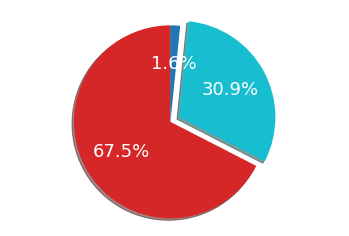

In [0]:
# Next, we visualize the percentage of winner from each class using a pie chart.

text_style = {'color': 'white' , 'size' : 18}

fig1, ax1 = plt.subplots()

ax1.pie((winner[0], winner[1], winner[2]), 
        explode = (0, 0.1, 0), 
        labels = ('Red', 'Blue', 'Draw'), 
        colors = ('tab:red','tab:cyan','tab:blue') , autopct='%1.1f%%',
        shadow = True, startangle = 90,
        textprops = text_style)

ax1.axis('equal') 

plt.show()

<font color = gray> Observations </font>
Win Percentage 
67.5% 
**Draw** 1.6%
Possible explanation: Most of the time, the <font color = red>red</font> corner houses the champion or the higher ranked fighter.
2. <font color = red> Popularity </font> by <font color = blue> Year </font>
We visualize the number of matches in each year between 1993 - 2019 using a bar chart

<BarContainer object of 27 artists>

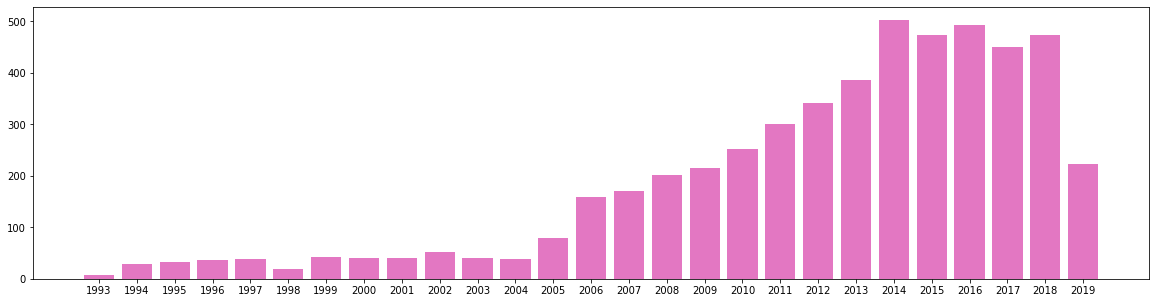

In [0]:
plt.figure(figsize = (20,5))

year = []
for match in matches['date']:

    match = match.split('-')[0]
    year.append(match)
               
myear = pd.Series(year).value_counts().sort_index(ascending = True)

plt.bar(x = myear.index, 
        height = myear.values, color = 'tab:pink')

<font color = gray> Observations </font>
The UFC began in 1993. Its popularity started increasing slowly from 2006 and peaked in 2014.
In 2019, the number of matches is low due to incomplete data.
3. <font color = red> Weight Class </font> and <font color = blue> Win Rate </font>
We will explore how players win in each weight class i.e. whethere Red or Blue fighters win more or less in each weight class.
We start by looking into the weight_class column & counting the number of matches in each weight class. Then, we create bar plots

In [0]:
mweightclass = matches['weight_class'].value_counts()
print('There are' , mweightclass.count(), 'weight classes in the UFC.')
mweightclass

There are 14 weight classes in the UFC.


Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64

In [0]:
mlist = mweightclass.index.tolist()

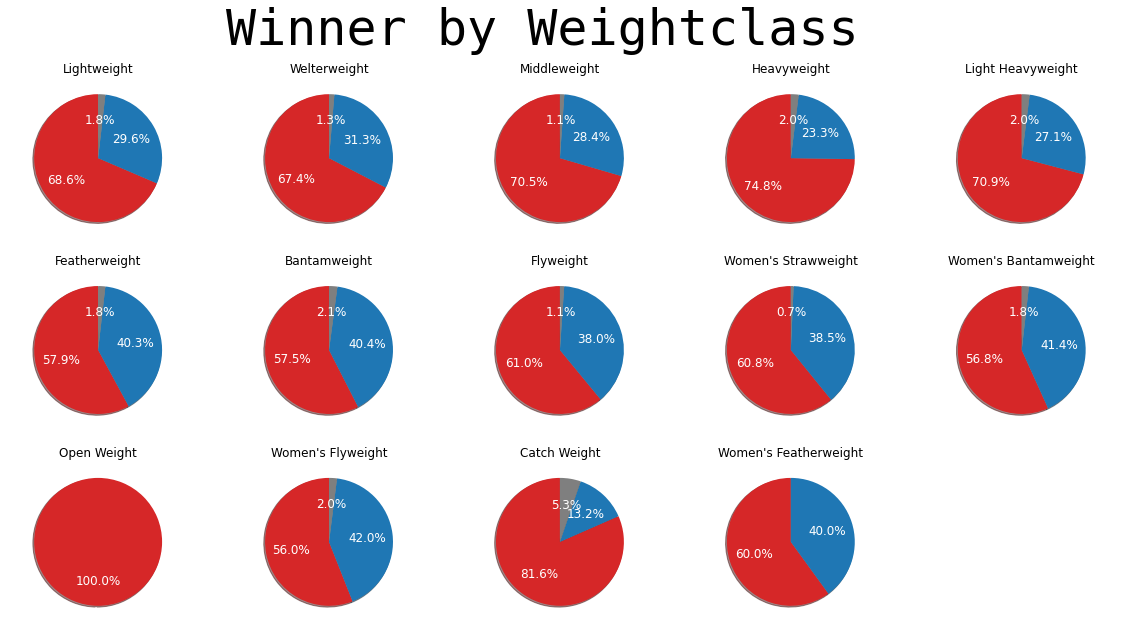

In [0]:
plt.figure(figsize = (20,10))
plt.suptitle('Winner by Weightclass', size = 50, color = 'black', family = 'monospace')

for i, j in zip(range(1,15), mlist):

    plt.subplot(3,5,i)

    a = matches[matches['weight_class'] == j]['Winner'].value_counts()

    labels = a.index.tolist()
    x = a.values

    text_style = {'color': 'white' , 'size' : 12}
    plt.pie(x = x, labels = labels, colors = ['tab:red', 'tab:blue', 'tab:gray'],
           autopct = '%1.1f%%', shadow = True, startangle = 90, textprops = text_style)
    
    plt.title(j)

<font color = gray> Observations </font>
Across all 14 weight classes, <font color = red> Red </font> almost always wins more than <font color = blue> Blue </font> does.
Outlier: Open Weight with Winner being <font color = red> Red </font> 100% of the time.
4. <font color = red> Age </font> and <font color = blue> Win Rate </font>


<BarContainer object of 26 artists>

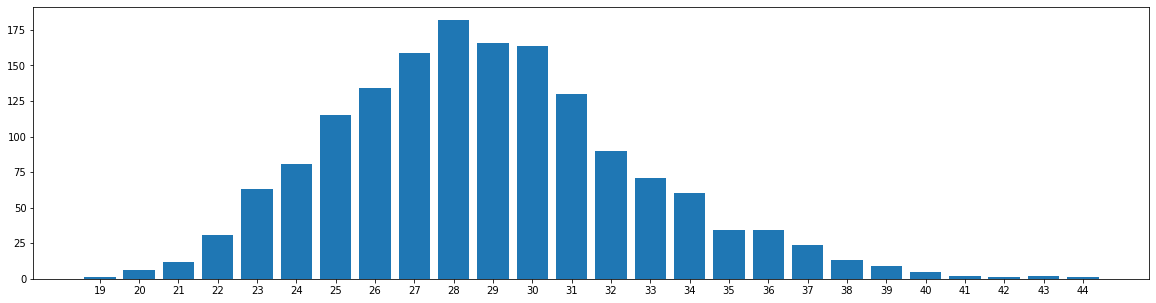

In [0]:
bluewins_age = matches[matches['Winner'] == "Blue"]['B_age'].value_counts()

plt.figure(figsize = (20,5))
plt.xticks(bluewins_age.index.to_numpy())
plt.bar(x = bluewins_age.index, height = bluewins_age.values, 
        color = 'tab:blue', align = 'center')


<BarContainer object of 29 artists>

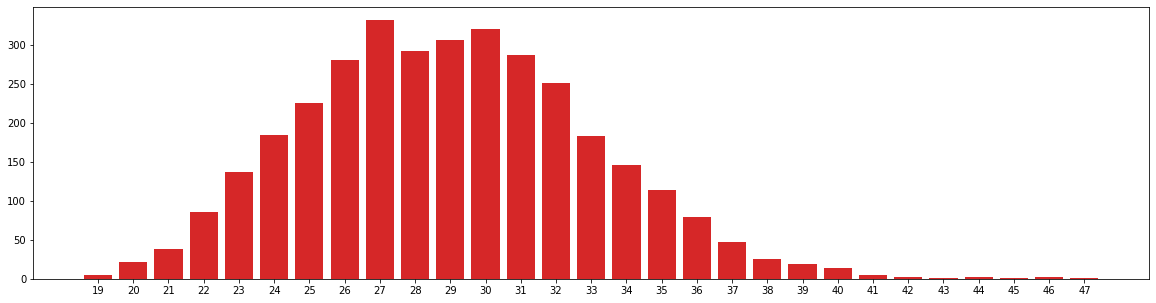

In [0]:
redwins_age = matches[matches['Winner'] == "Red"]['R_age'].value_counts()

plt.figure(figsize = (20,5))
plt.xticks(redwins_age.index.to_numpy())
plt.bar(x = redwins_age.index, height = redwins_age.values, 
        color = 'tab:red', align = 'center')


<font color = gray> Observations </font>
The prime age range to be successful as a UFC fighter is between 26 to 31. This is true for both experienced fighters <font color = red> (Red) </font> and novice fighters <font color = blue> (Blue) </font>.
5. <font color = red> Locations </font> and <font color = blue> Win Rate </font>

In [0]:
print ('There are', len(matches['location'].unique()), 'worldwide locations where UFC fights take place.')

There are 157 worldwide locations where UFC fights take place.


<BarContainer object of 20 artists>

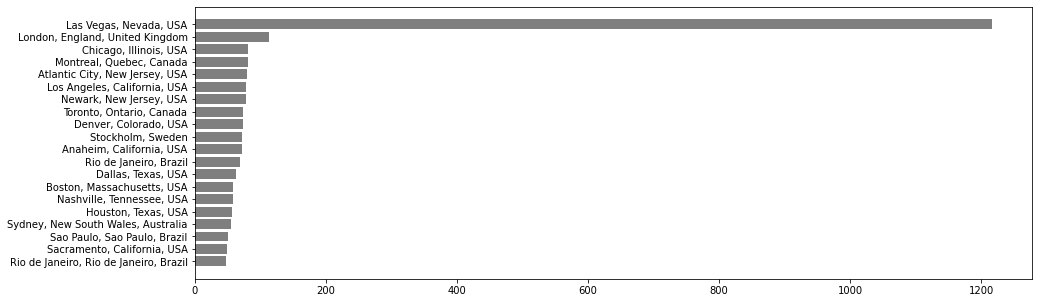

In [0]:
#top 5 most popular locations

x = matches['location'].value_counts().sort_values(ascending = False)[:20].index[::-1]
height = matches['location'].value_counts().sort_values(ascending = False)[:20].values[::-1]

plt.figure (figsize = (15,5))
plt.barh(y = x, width = height, color = 'tab:gray')

<BarContainer object of 20 artists>

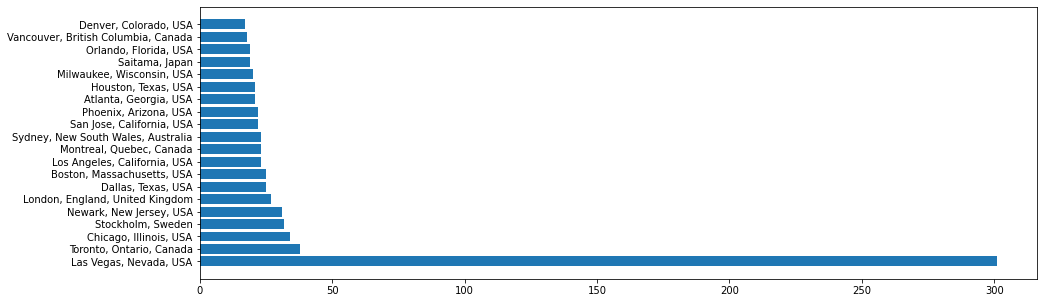

In [0]:
bluewins_location = matches[matches['Winner'] == "Blue"]['location'].value_counts().sort_values(ascending = False)
bluewins_location

plt.figure (figsize = (15,5))
plt.barh(y = bluewins_location[:20].index, width = bluewins_location[:20].values, color = 'tab:blue')

<BarContainer object of 20 artists>

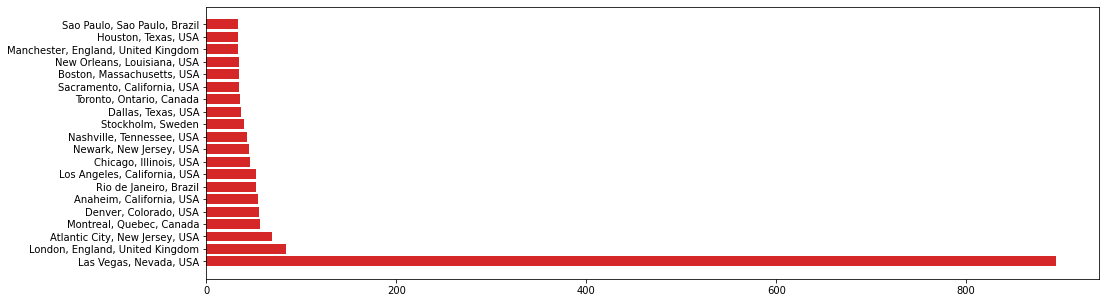

In [0]:
# where Red wins the most

redwins_location = matches[matches['Winner'] == "Red"]['location'].value_counts().sort_values(ascending = False)
redwins_location

plt.figure (figsize = (16,5))
plt.barh(y = redwins_location[:20].index, width = redwins_location[:20].values, color = 'tab:red')


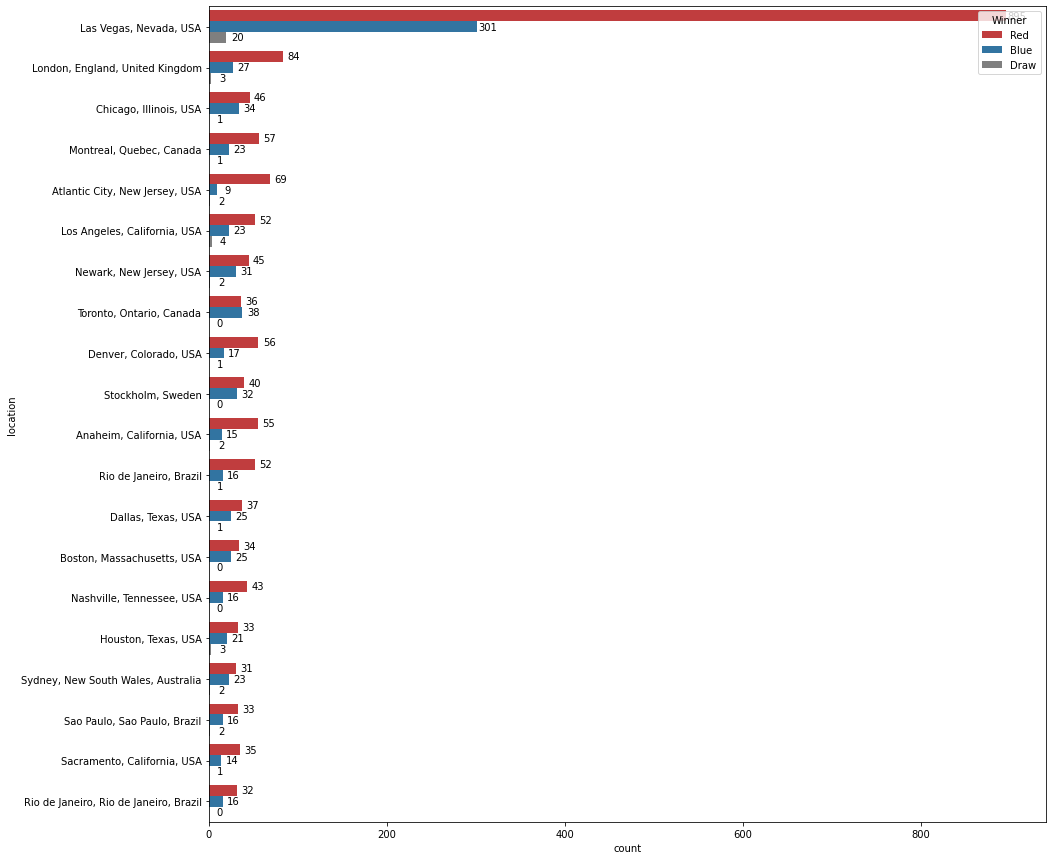

In [0]:
locations5 = matches['location'].value_counts().sort_values(ascending = False)[:20].index

locations5_df = matches[matches['location'].isin(locations5)]


plt.figure(figsize=(15,15))
sns.countplot(data = locations5_df, y = 'location', hue = 'Winner', 
              order = locations5, palette = ['tab:red', 'tab:blue', 'tab:gray'], orient = 'h')


ax = plt.gca()

# print(ax.patches[1].get_height())

for p in ax.patches:
    
    try:
        x = int(p.get_width())
    
    except:
        x = 0
        
#     print(label)
        
#     print(p.get_width())
    ax.text(x = x + 12 , y = p.get_y() + p.get_height()/2, 
            s = x, ha = 'center', va = 'center')

In [0]:
# percentage top 20 locations / all locations 
perc = matches['location'].value_counts().sort_values(ascending = False)[:20].values.sum() / matches['location'].value_counts().sort_values(ascending = False).values.sum()
perc_string = str(round(perc*100,2))+'%'
perc_string

'49.24%'

<font color = gray> Observations </font>

In the top 20 locations where 49.24% of fights occur, we can observe that <font color = red> Red </font> wins over <font color = blue> Blue </font> most of the time. Toronto, Ontario, Canada is an exception, where <font color = blue> Blue </font> wins over <font color = red> Red </font> in absolute terms.

The discrepancy between the locations may vary. In Las Vegas, for instance, Red wins over Blue more than 60% of the time. The difference is not as clear for some other locations, such as Stockholm, Sweden (R: 40, B: 32).

# Data Cleaning

Below we are going through the necessary Steps to clean the data.

In [0]:
df = matches
df_fighters = fighters

In [0]:
# there are just 32 rows which do not have referee too small to consider. 
# df.drop(labels=df[df['Referee'].isnull()].index,inplace=True)

In [0]:
# We will treat weight class as a category variable
df['weight_class'] = df['weight_class'].astype('category')

In [0]:
# We will treat Stance as a category variable
df['R_Stance'] = df['R_Stance'].astype('category')

In [0]:
# No we want correct the variables in Fighters
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
fighter_name    3313 non-null object
Height          3050 non-null object
Weight          3238 non-null object
Reach           1569 non-null object
Stance          2439 non-null object
DOB             2573 non-null object
dtypes: object(6)
memory usage: 155.4+ KB


It is important to convert the Height-Weight-Reach data and for that we'll define a couple of conversion functions first.

In [0]:
def height_imp_to_met(imp):
  """ Takes a string imp and converts it to a string met that contains the converted height in centimeters
  """
  try:
    feet, inches = imp.split("'")
    feet = int(feet.strip())
    inches, _ = inches.split('"')
    inches = int(inches.strip())
    cm = feet*30.48 + inches*2.54
    return str(int(cm))
  except AttributeError:
    return 0


def weight_imp_to_met(imp):
  """ Takes a string imp and converts it to a string met that contains the converted weight in kilogram
  """
  try:
    if imp == 'nan':
      return '0'
    lbs, _ = imp.strip().split()
    lbs = int(lbs)
    return str(int(lbs*0.453592))
  except AttributeError:
    return 0

def reach_imp_to_met(imp):
  """ Takes a string imp and converts it to a string met that contains the converted reach in centimeters
  """
  try:
    inches, _ = imp.split('"')
    inches = int(inches.strip())
    return str(int(inches*2.54))
  except AttributeError:
    return np.nan

In [0]:
df_fighters['Height'] = df_fighters['Height'].apply(height_imp_to_met)
df_fighters['Weight'] = df_fighters['Weight'].apply(weight_imp_to_met)
df_fighters['Reach'] = df_fighters['Reach'].apply(reach_imp_to_met)

In [0]:
df_fighters.sample(1)

,fighter_name,Height,Weight,Reach,Stance,DOB
153,Alvin Robinson,175,70,172,Southpaw,"Jul 16, 1982"


In [0]:
df_fighters['DOB'] = df_fighters['DOB'].astype('datetime64')
df_fighters['Height'] = df_fighters['Height'].astype('float64')
df_fighters['Weight'] = df_fighters['Weight'].astype('float64')
df_fighters['Reach'] = df_fighters['Reach'].astype('float64')

We're dropping all the Fights, that do not contain any stats and the rows where we don't have the fighters data.

In [0]:
# 650 rows which would contain barely any data 
df.drop(labels=df[df['R_avg_TD_pct'].isnull()].index,inplace=True)

In [0]:
# 88 rows which would contain barely any data 
df.drop(labels=df[df['R_Stance'].isnull()].index,inplace=True)

In [0]:
# 180 rows
df.drop(labels=df[df['R_Reach_cms'].isnull()].index,inplace=True)

In [0]:
# 108 rows
df.drop(labels=df[df['B_age'].isnull()].index,inplace=True)

In [0]:
# 28 rows
df.drop(labels=df[df['R_age'].isnull()].index,inplace=True)

Taking a closer look at our Fighters table.
First we're making sure again, that our stances data is clean to give us an overview over the different stances and then weight classes.

In [0]:
print(df_fighters['Stance'].unique())
print(df_fighters['Stance'].isnull().sum())
print('\n')
print(df['weight_class'].unique())
print(df['weight_class'].isnull().sum())

[nan 'Orthodox' 'Southpaw' 'Switch' 'Open Stance' 'Sideways']
874


[Bantamweight, Women's Flyweight, Lightweight, Heavyweight, Women's Strawweight, ..., Welterweight, Women's Featherweight, Flyweight, Catch Weight, Open Weight]
Length: 14
Categories (14, object): [Bantamweight, Women's Flyweight, Lightweight, Heavyweight, ...,
                          Women's Featherweight, Flyweight, Catch Weight, Open Weight]
0


Now let's take a look at the Distribution over all Fighters.

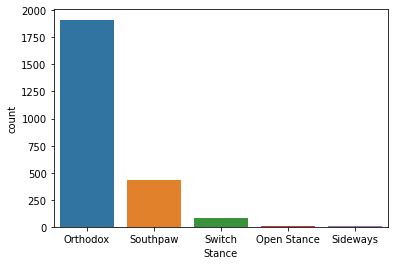

In [0]:
sns.countplot(df_fighters['Stance']);

Now it might be interesting to see the winning percentages of every stance. We will disregard Open and Sideways, since there are not enough Fighters, so the statistic would be skewed.

While we're at it we'll add Weight class too.

In [0]:
df_fighters.insert(6, 'weight_class', np.NaN)
df_fighters.insert(7, 'Wins', '0.0')
df_fighters.insert(8, 'Losses', '0.0')
df_fighters.insert(9, 'Draws', '0.0')
df_fighters.insert(10, 'total_fights', '0.0')
df_fighters.insert(11, 'win_pct', '0.0')

In [0]:
for fighter in df_fighters['fighter_name'].values:
  
  weight_class = df[df['B_fighter'] == fighter]['weight_class'].unique()
  
  # Drop Catch Weight, if there are other options
  if len(weight_class)>1:
    if 'Catch Weight' in weight_class:
      weight_class = np.delete(weight_class, np.argwhere(weight_class=='Catch Weight'))

  # Check if fighter had a fight
  if len(weight_class)>0:    
    weight_class = weight_class[0]
  else:
    weight_class = np.NaN

  curr_wins = max(
  df[df['B_fighter'] == fighter]['B_wins'].max(),
  df[df['R_fighter'] == fighter]['R_wins'].max()
  )

  curr_losses = max(
  df[df['B_fighter'] == fighter]['B_losses'].max(),
  df[df['R_fighter'] == fighter]['R_losses'].max()
  )

  curr_draws = max(
  df[df['B_fighter'] == fighter]['B_draw'].max(),
  df[df['R_fighter'] == fighter]['R_draw'].max()
  )

  total_fights = curr_wins + curr_losses + curr_draws

  try:
    win_pct = round(curr_wins/(curr_wins+curr_losses)*100, 2)
  except ZeroDivisionError:
    win_pct = 0.0

  fighter_i = df_fighters.loc[df_fighters['fighter_name'] == fighter].index
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('weight_class')] = weight_class
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('Wins')] = curr_wins
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('Losses')] = curr_losses
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('Draws')] = curr_draws
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('total_fights')] = total_fights
  df_fighters.iloc[fighter_i, df_fighters.columns.get_loc('win_pct')] = win_pct

In [0]:
df_fighters.sample(5)

,fighter_name,Height,Weight,Reach,Stance,DOB,weight_class,Wins,Losses,Draws,total_fights,win_pct
1458,Jeremiah Constant,185.0,108.0,NaN,Orthodox,1974-07-19,NaN,NaN,NaN,NaN,NaN,NaN
288,Austin Vanderford,180.0,77.0,187.0,Orthodox,1990-03-21,NaN,NaN,NaN,NaN,NaN,NaN
318,Bentley Syler,162.0,56.0,172.0,Orthodox,1982-12-22,NaN,NaN,NaN,NaN,NaN,NaN
2619,Rhadi Ferguson,170.0,92.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1502,Jessica Eye,167.0,56.0,167.0,Orthodox,1986-07-27,Women's Flyweight,4,6,0,10,40


In [0]:
# Now we set the variable type
df_fighters['Wins'] = df_fighters['Wins'].astype('float64')
df_fighters['Losses'] = df_fighters['Losses'].astype('float64')
df_fighters['Draws'] = df_fighters['Draws'].astype('float64')
df_fighters['total_fights'] = df_fighters['total_fights'].astype('float64')
df_fighters['win_pct'] = df_fighters['win_pct'].astype('float64')
df_fighters['weight_class'] = df_fighters['weight_class'].astype('category')

We now have to drop all the fighters that don't have any existing matches.

In [0]:
df_active_fighters = df_fighters[df_fighters['Wins'].notnull()]

In [0]:
stances = ['Orthodox', 'Southpaw', 'Switch']
for stance in stances:
  print(stance, df_active_fighters[df_active_fighters['Stance'] == stance]['win_pct'].mean())

Orthodox 43.15356011183597
Southpaw 43.01187500000001
Switch 42.73462962962963


So we can see that the choice of stance is negligible when wanting to increase your winning percentage.

Now let's determine the prototypical size per weight class.

In [0]:
wc = df_fighters[df_fighters['total_fights']>3]
wc = wc.groupby('weight_class', axis=0)

In [0]:
weight_class = 'Welterweight'

In [0]:
wc.get_group(weight_class).sort_values('win_pct', ascending=False).head(5)

,fighter_name,Height,Weight,Reach,Stance,DOB,weight_class,Wins,Losses,Draws,total_fights,win_pct
1809,Kamaru Usman,182.0,77.0,193.0,Switch,1987-05-11,Welterweight,9.0,0.0,0.0,9.0,100.00
650,Colby Covington,180.0,77.0,182.0,Orthodox,1988-02-22,Welterweight,8.0,1.0,0.0,9.0,88.89
1599,John Hathaway,185.0,77.0,190.0,Orthodox,1987-07-23,Welterweight,7.0,1.0,0.0,8.0,87.50
984,Elizeu Zaleski dos Santos,180.0,77.0,185.0,Orthodox,1986-12-11,Welterweight,6.0,1.0,0.0,7.0,85.71
2259,Michel Prazeres,167.0,77.0,170.0,Orthodox,1981-07-25,Welterweight,10.0,2.0,0.0,12.0,83.33


In [0]:
body = pd.DataFrame({'Avg Height':np.NaN, 'Avg Weight': np.NaN, 'Avg Reach': np.NaN}, index=[])
for weight_class in df_fighters['weight_class'].drop_duplicates()[1:]:

  winners = wc.get_group(weight_class)[wc.get_group(weight_class)['win_pct'] >= 70]
  height_mean = winners['Height'].mean()
  weight_mean = winners['Weight'].mean()
  reach_mean = winners['Reach'].mean()

  #winners = pd.DataFrame({weight_class: [height_mean, weight_mean, reach_mean]}, index=['Avg Height', 'Avg Weigth', 'Avg Reach'])
  winners = pd.DataFrame({'Avg Height':height_mean, 'Avg Weight': weight_mean, 'Avg Reach': reach_mean}, index=[weight_class])

  # body += weight_class
  body = pd.concat([body, winners])

body.drop(labels=['Catch Weight', 'Open Weight'], inplace=True)
body.sort_values('Avg Weight', inplace=True)
body

,Avg Height,Avg Weight,Avg Reach
Women's Strawweight,162.600000,52.800000,163.800000
Women's Flyweight,166.000000,56.000000,167.500000
Flyweight,165.555556,57.111111,168.666667
Women's Bantamweight,169.250000,59.750000,173.500000
Bantamweight,168.733333,61.000000,171.933333
Women's Featherweight,172.000000,65.000000,175.000000
Featherweight,175.555556,65.055556,180.166667
Lightweight,177.000000,70.264706,182.205882
Welterweight,181.066667,77.000000,187.633333
Middleweight,185.037037,83.148148,190.720000


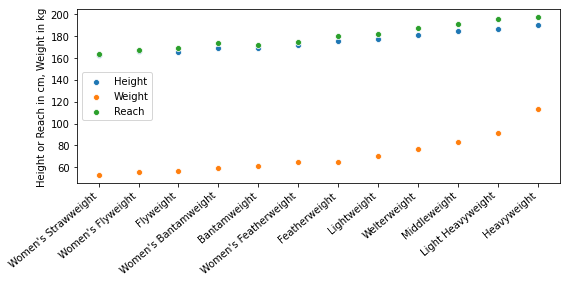

In [0]:
plt.figure(figsize=(8,4))

ax1 = sns.scatterplot(x=body.index, y=body['Avg Height'], label='Height')
ax2 = sns.scatterplot(x=body.index, y=body['Avg Weight'], label='Weight')
ax3 = sns.scatterplot(x=body.index, y=body['Avg Reach'], label='Reach')
ax1.set_xticklabels(body.index, rotation=40, ha="right")
ax2.set_xticklabels(body.index, rotation=40, ha="right")
ax3.set_xticklabels(body.index, rotation=40, ha="right")
ax1.set_ylabel('Height or Reach in cm, Weight in kg')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Blue Player Height Vs Reach')

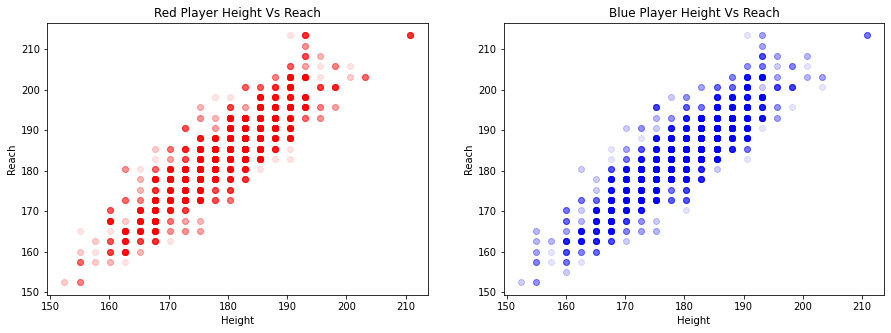

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(matches['R_Height_cms'],matches['R_Reach_cms'],color='Red',alpha=0.1)
plt.xlabel('Height')
plt.ylabel('Reach')
plt.title ('Red Player Height Vs Reach')

plt.subplot(1,2,2)
plt.scatter(matches['B_Height_cms'],matches['B_Reach_cms'],color='Blue',alpha=0.1)
plt.xlabel('Height')
plt.ylabel('Reach')
plt.title ('Blue Player Height Vs Reach')

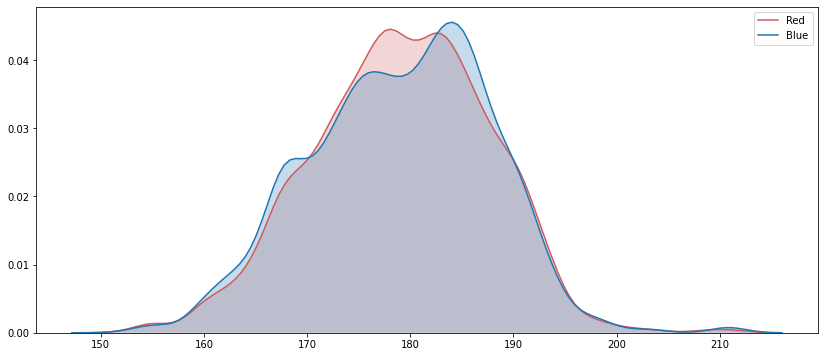

In [0]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(matches['B_Height_cms'], shade=True, color='indianred', label='Red')
sns.kdeplot(matches['R_Height_cms'], shade=True, label='Blue')

In [0]:
matches['Height Difference'] = matches['B_Height_cms'] - matches['R_Height_cms']
matches[['Height Difference', 'Winner']].groupby('Winner').mean()

,Height Difference
Winner,
Blue,0.361293
Draw,1.288406
Red,-0.130880


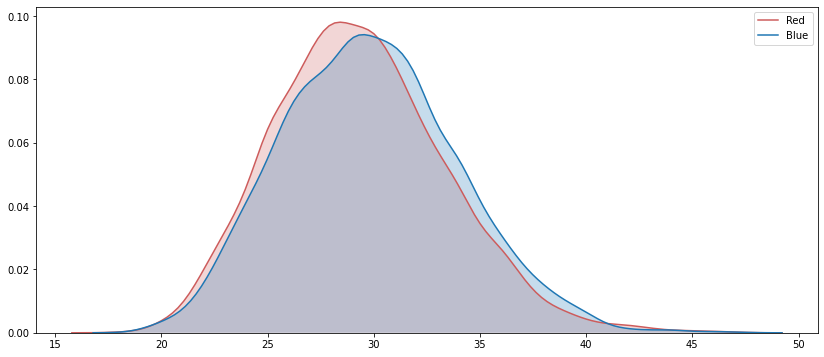

In [0]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(matches['B_age'], shade=True, color='indianred', label='Red')
sns.kdeplot(matches['R_age'], shade=True, label='Blue')

<BarContainer object of 25 artists>

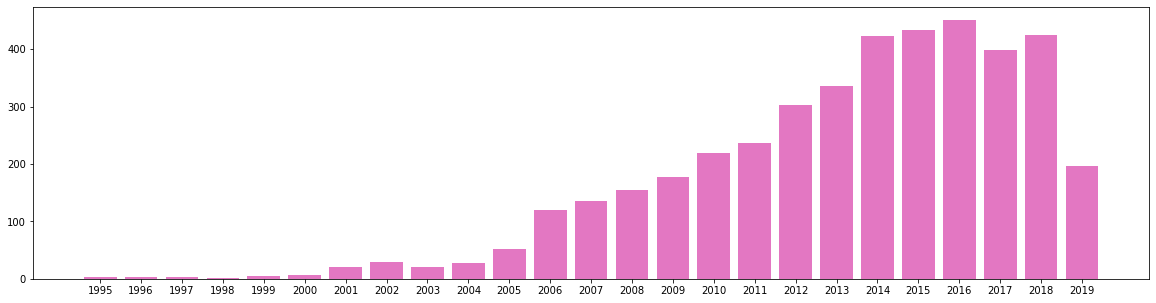

In [0]:
plt.figure(figsize = (20,5))

year = []
for match in matches['date']:

    match = match.split('-')[0]
    year.append(match)
               
myear = pd.Series(year).value_counts().sort_index(ascending = True)

plt.bar(x = myear.index, 
        height = myear.values, color = 'tab:pink')

<font color = red > Sum</font><font color = blue >mary </font>

UFC is a highly unpredictable sports. Given the time & tools at our disposal, we have arrived at the following insights from our dataset which might help a viewer to place a better bet:
<font color = red> Red </font> Corner tends to win more than <font color = blue> Blue </font>.

Across all Weight Classes, <font color = red> Red </font> wins more than <font color = blue> Blue </font>. However, the disparities vary. For example, in Open Weight, there is almost 0 chance that the Blue fighter will emerge victorious. Alternatively, in Bantam Weight, the chances of either fighter to be victorious are about the same.

The most successful age range </font> of UFC fighters are between 27 - 31. We can utilize this to compare fighters if they are not in the same age group.
The popularity of UFC is increasing, which implies that there our target audience group may be growing.

Across all locations where fights are held, the possibility of <font color = red> Red </font> winning the fight over <font color = blue> Blue </font> is always higher. However, disparity varies. For instance, for fights in the USA, <font color = red> Red </font> wins over <font color = blue> Blue </font> most of the time. On the other hand, fights in Australia see about the same chances of <font color = red> Red </font> & <font color = blue> Blue </font> emerging victorious.


In [0]:
df_fighters.sample(3)

,fighter_name,Height,Weight,Reach,Stance,DOB,weight_class,Wins,Losses,Draws,total_fights,win_pct
16,Aaron Wilkinson,177.0,70.0,NaN,NaN,1987-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2060,Mads Burnell,172.0,65.0,175.0,Orthodox,1994-03-06,Featherweight,1.0,1.0,0.0,2.0,50.0
2353,Mu Bae Choi,187.0,104.0,NaN,Orthodox,1970-06-27,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_fighters.to_csv('f.csv')
df.to_csv('m.csv')

In [0]:
from google.colab import files
files.download("f.csv")
files.download("m.csv")